# PROJECT DETAILS

Name : Aman Jha

Roll Number : 2k18/IT/018

Lab : Deep Learning G2

Task : To evaluate performance of Covolutionar neural network on mnist dataset

In [ ]:
from numpy import mean,std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
def load_dataset() :

  (trainX, trainY), (testX, testY) = mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0],28,28,1))
  testX = testX.reshape((testX.shape[0],28,28,1))

  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

In [ ]:
def prep_pixels(train,test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  train_norm /= 255
  test_norm /= 255

  return train_norm, test_norm

In [ ]:
trainX, trainY, testX, testY = load_dataset()

In [ ]:
trainX, testX = prep_pixels(trainX, testX)

In [ ]:
def define_model() :

  model = Sequential()
  model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer = 'he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(100,activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))

  opt = SGD(lr=0.01, momentum = 0.9)
  model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model = define_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY,batch_size=128,epochs=25,validation_data = (testX,testY),verbose=2)

Epoch 1/25
469/469 - 24s - loss: 0.2798 - accuracy: 0.9168 - val_loss: 0.1429 - val_accuracy: 0.9562
Epoch 2/25
469/469 - 22s - loss: 0.1220 - accuracy: 0.9635 - val_loss: 0.0910 - val_accuracy: 0.9728
Epoch 3/25
469/469 - 22s - loss: 0.0813 - accuracy: 0.9766 - val_loss: 0.0785 - val_accuracy: 0.9758
Epoch 4/25
469/469 - 22s - loss: 0.0624 - accuracy: 0.9818 - val_loss: 0.0658 - val_accuracy: 0.9790
Epoch 5/25
469/469 - 22s - loss: 0.0483 - accuracy: 0.9861 - val_loss: 0.0523 - val_accuracy: 0.9831
Epoch 6/25
469/469 - 22s - loss: 0.0409 - accuracy: 0.9879 - val_loss: 0.0483 - val_accuracy: 0.9833
Epoch 7/25
469/469 - 22s - loss: 0.0350 - accuracy: 0.9900 - val_loss: 0.0469 - val_accuracy: 0.9840
Epoch 8/25
469/469 - 22s - loss: 0.0301 - accuracy: 0.9912 - val_loss: 0.0489 - val_accuracy: 0.9832
Epoch 9/25
469/469 - 22s - loss: 0.0254 - accuracy: 0.9929 - val_loss: 0.0497 - val_accuracy: 0.9835
Epoch 10/25
469/469 - 22s - loss: 0.0225 - accuracy: 0.9936 - val_loss: 0.0447 - val_accura

313/313 [==============================] - 2s 7ms/step - loss: 0.0422 - accuracy: 0.9867


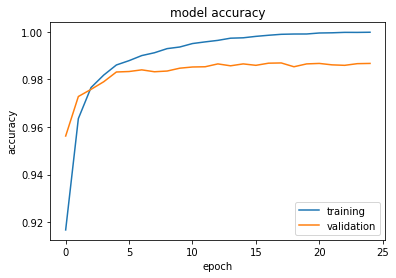

In [ ]:
lose,accuracy = model.evaluate(testX,testY,verbose = True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

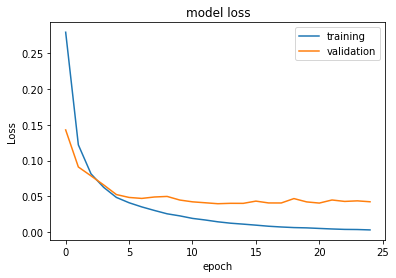

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

In [ ]:
y_pred = model.predict(testX)

Y_pred = np.argmax(y_pred,1)
Y_test = np.argmax(testY,1)

mat = confusion_matrix(Y_test, Y_pred)
print(mat)

[[ 972    0    1    0    0    1    4    1    1    0]
 [   0 1128    1    1    0    2    1    1    1    0]
 [   1    1 1018    1    2    0    1    4    4    0]
 [   0    0    3  996    0    6    0    1    3    1]
 [   0    1    1    0  974    0    1    0    0    5]
 [   1    0    0    5    0  880    4    0    1    1]
 [   5    3    0    0    3    1  946    0    0    0]
 [   0    1    9    0    1    0    0 1015    0    2]
 [   5    0    1    2    1    3    0    2  956    4]
 [   1    0    0    4   16    3    0    2    1  982]]
